# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Speed Dating Data.csv', encoding = 'ISO-8859-1')

In [3]:
print(df.shape)
df.head(10)

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [22]:
#df.info(verbose=True)

In [4]:
cols=df.columns

In [5]:
base=df[cols[0:13]]
basem=base[base['gender']==1]
basef=base[base['gender']==0]

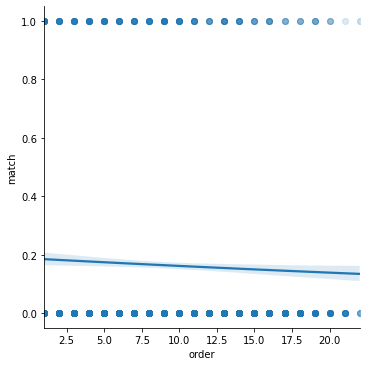

In [6]:
sns.lmplot(x="order", y="match", data= basef, logistic = True, scatter_kws={"alpha":.05})

# Différence d'age

In [7]:
df_age=df
df_age.dropna(subset=['age','age_o'],inplace=True)

In [8]:
df_ageM=df_age.loc[df_age['gender']==1]
df_ageF=df_age.loc[df_age['gender']==0]

In [9]:
df_age['AgeDiff']=abs(df_age['age']-df_age['age_o'])
df_ageM.loc[df_ageM.index,'AgeDiff']=(df_ageM['age_o']-df_ageM['age'])
df_ageF.loc[df_ageF.index,'AgeDiff']=(df_ageF['age_o']-df_ageF['age'])

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


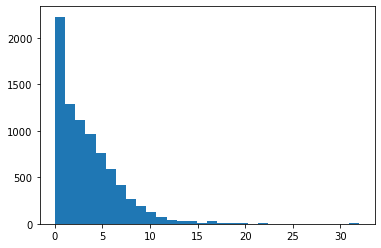

In [10]:
plt.hist(np.asarray(df_age['AgeDiff']),30)
plt.show()

Est-ce que la différence d'age entraine plus de rejet?
pour les F, regarder effet H + jeune ou H + vieux,
idem pour les H

In [34]:
#méthode pour retrouver le nom d'une colonne
dcol=[x for x in df.columns if x.startswith('d')]
dcol

['dec_o', 'date', 'dining', 'dec', 'date_3']

In [126]:
AgeDiffRatioAll=df_age.groupby('AgeDiff').sum()['match']/df_age.groupby('AgeDiff').size()
AgeDiffRatioM=df_ageM.loc[df_ageM['match']==0,:].groupby('AgeDiff').sum()['dec']/df_ageM.loc[df_ageM['match']==0,:].groupby('AgeDiff').size()
AgeDiffRatioF=df_ageF.loc[df_ageF['match']==0,:].groupby('AgeDiff').sum()['dec']/df_ageF.loc[df_ageF['match']==0,:].groupby('AgeDiff').size()

<function matplotlib.pyplot.show(close=None, block=None)>

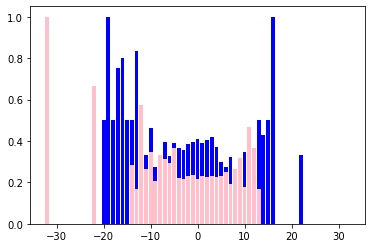

In [127]:
plt.bar(AgeDiffRatioM.index,AgeDiffRatioM.values,color='b')
plt.bar(AgeDiffRatioF.index,AgeDiffRatioF.values,color='pink')
plt.show

In [128]:
AgeDiffRatioAll=df_age.groupby('AgeDiff').sum()['match']/df_age.groupby('AgeDiff').size()
AgeDiffRatioM=df_ageM.groupby('AgeDiff').sum()['dec']/df_ageM.groupby('AgeDiff').size()
AgeDiffRatioF=df_ageF.groupby('AgeDiff').sum()['dec']/df_ageF.groupby('AgeDiff').size()

<function matplotlib.pyplot.show(close=None, block=None)>

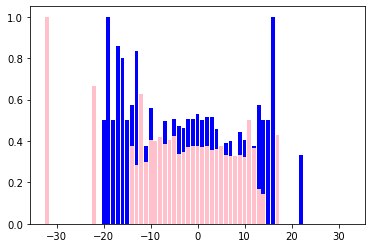

In [129]:
plt.bar(AgeDiffRatioM.index,AgeDiffRatioM.values,color='b')
plt.bar(AgeDiffRatioF.index,AgeDiffRatioF.values,color='pink')
plt.show

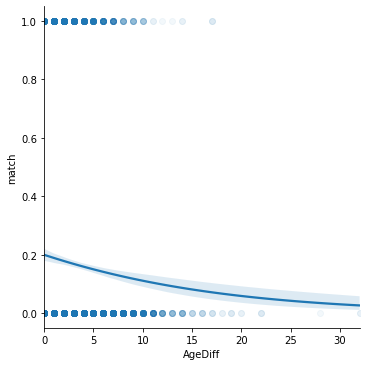

In [36]:
sns.lmplot(x="AgeDiff", y="match", data= df_age.loc[df_age['gender']==0], logistic = True, scatter_kws={"alpha":.05})

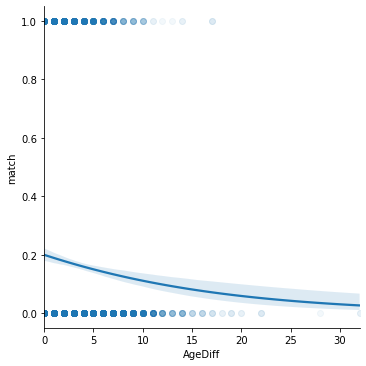

In [37]:
sns.lmplot(x="AgeDiff", y="match", data= df_age.loc[df_age['gender']==1], logistic = True, scatter_kws={"alpha":.05})